# Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to predict the sale price of buldozers.


We're going to take the following approach:

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problen Definition


> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much simi lar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers

The data for this competition is split into three parts: 

  * Train.csv is the training set, which contains data through the end of 2011.
  * Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this         set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
  * Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1,         2012 - November 2012. Your score on the test set determines your final rank for the competition.
    
## 3. Evaluation

> The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.  The goal for this project will be to build a machine learning model that minimizes RMLSE.

For more on the evaluation of this prohect check:
https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation



## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can veiw this data dictionary on Goodle sheets: https://docs.google.com/spreadsheets/d/1d62D29a1XoRpF9zS-XWCgcVzoc3guzvJ/edit?usp=sharing&ouid=111852688874937054901&rtpof=true&sd=true

## Preparing the tools

We're going to use Pandas, Matplotlib and Numpy for data analysis and manipulation

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Load Data

In [2]:
# Import Training and Validation sets
df = pd.read_csv("TrainAndValid.csv", low_memory= False)
df.head(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1139255,26500.0,1001274,4605,121,3.0,2004,508.0,Low,12/18/2008 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1139256,21000.0,772701,1937,121,3.0,1993,11540.0,High,8/26/2004 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
7,1139261,27000.0,902002,3539,121,3.0,2001,4883.0,High,11/17/2005 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1139272,21500.0,1036251,36003,121,3.0,2008,302.0,Low,8/27/2009 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
9,1139275,65000.0,1016474,3883,121,3.0,1000,20700.0,Medium,8/9/2007 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [3]:
df.tail(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
412688,6333305,11500.0,1800259,21437,149,1.0,2006,NaN,NaN,2/13/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412689,6333314,13000.0,1908162,21437,149,2.0,2006,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412690,6333330,20500.0,1879923,21446,149,2.0,2006,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412691,6333339,13000.0,1856845,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412692,6333343,10000.0,1799614,21435,149,1.0,2005,NaN,NaN,2/13/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412697,6333349,13000.0,1944743,21436,149,2.0,2006,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
# View nulls values
df.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
# View columns
columns = [i for i in df.columns]
columns

['SalesID',
 'SalePrice',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'saledate',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

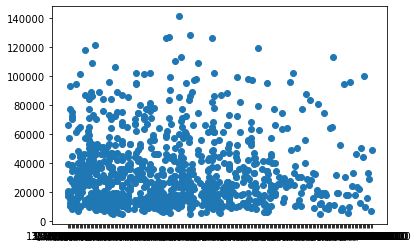

In [7]:
#Visualise data
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [8]:
df["SalePrice"].dtype

dtype('float64')

<AxesSubplot:ylabel='Frequency'>

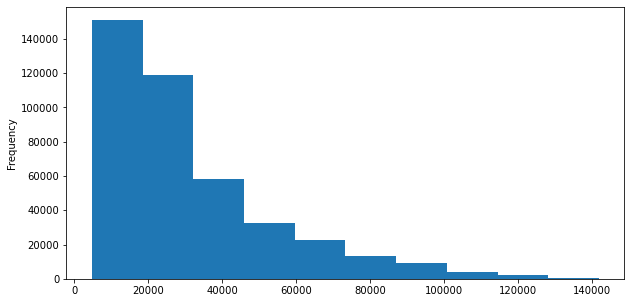

In [9]:
df["SalePrice"].plot.hist(figsize=(10,5))

### Parse DataFrame date colum


In [10]:
df = pd.read_csv("TrainAndValid.csv",
                  low_memory=False,
                  parse_dates=['saledate'])

In [11]:
df['saledate'].dtype

dtype('<M8[ns]')

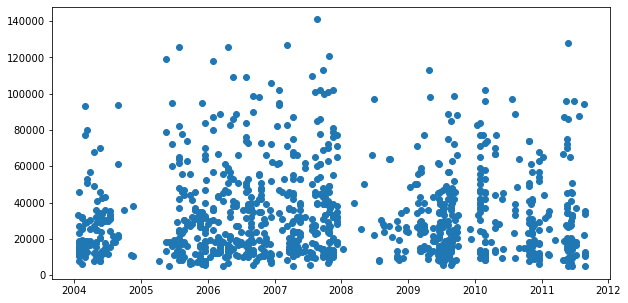

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [13]:
columns

['SalesID',
 'SalePrice',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'saledate',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

### Sort DateFrame by saledate

In [14]:
df['saledate'] = pd.to_datetime(df['saledate'])

In [15]:
df.sort_values(by="saledate", inplace= True, ascending= True)

In [16]:
df['saledate'].head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

### Copy DataFrame

In [17]:
df_copy = df.copy()

In [18]:
df_copy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [19]:
df["saledate"].dtype

dtype('<M8[ns]')

### Add datetime parameters for `saledate` column

In [20]:
df_copy["saleYear"] = df_copy["saledate"].dt.year
df_copy["saleMonth"] = df_copy["saledate"].dt.month
df_copy["saleDayofWeek"] = df_copy["saledate"].dt.dayofweek

In [21]:
### Remove saledate columns

df_copy.drop("saledate", axis =1)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDayofWeek
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,1
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,1
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,1
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,1
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,D38E,...,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,4,5
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,4,5
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,337G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,4,5
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,12G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,4,5


<AxesSubplot:ylabel='Frequency'>

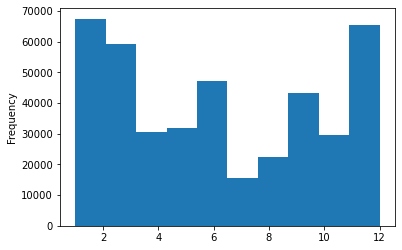

In [22]:
# Product demand based on month

df_copy["saleMonth"].plot.hist()

Text(0.5, 0, "['0 = Mon', '1 = Tues', '2 = Wed', '3 = Thurs', '4 = Fri', '5= Sat', '6 = Sun']")

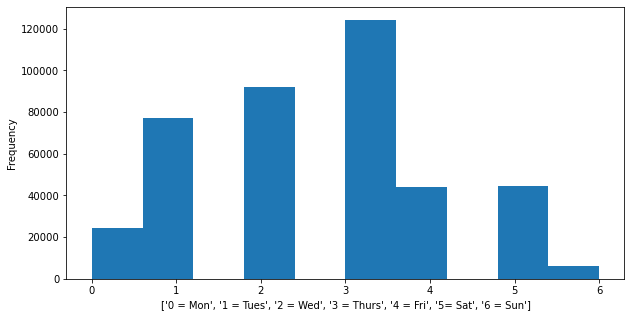

In [23]:
# Product demand based on day of the week

df_copy["saleDayofWeek"].plot.hist(figsize=(10,5))
plt.xlabel(["0 = Mon", "1 = Tues", "2 = Wed", "3 = Thurs", "4 = Fri", "5= Sat", "6 = Sun"])

### View top 5 States

In [24]:
df_copy["state"].value_counts().head()

Florida       67320
Texas         53110
California    29761
Washington    16222
Georgia       14633
Name: state, dtype: int64

## Convert strings to categories

In [25]:
pd.api.types.is_string_dtype(df_copy["UsageBand"])

True

In [26]:
# Find the columns which contain strings
for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [27]:
# Turn strings to categories
for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        df_copy[label] = content.astype("category").cat.as_ordered()

In [28]:
df_copy.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                         category
saledate                    datetime64[ns]
fiModelDesc                       category
fiBaseModel                       category
fiSecondaryDesc                   category
fiModelSeries                     category
fiModelDescriptor                 category
ProductSize                       category
fiProductClassDesc                category
state                             category
ProductGroup                      category
ProductGroupDesc                  category
Drive_System                      category
Enclosure                         category
Forks                             category
Pad_Type   

In [29]:
df_copy["state"].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [30]:
df_copy["state"].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [31]:
df_copy.isnull().sum()/len(df_copy)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
saledate                    0.000000
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
T

### Fill Missing Values

#### Missing Numeric Values

In [32]:
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDayofWeek


In [41]:
# Check for null values

for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [43]:
# Fill numeric rows with median
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_copy[label] = content.fillna(content.median())            

In [50]:
# Check for nulls values
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
        else:
            print("No Null Values")

No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values
No Null Values


#### MIssing Categorical Values

In [52]:
#check for categorical columns
for label, content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
saledate
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [54]:
# Turn categorical into number and Fill missing categorical values

In [56]:
for label, content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_copy[label] = pd.Categorical(content).codes + 1            

In [58]:
df_copy.isnull().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
saledate                    0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock 

### Save preprocessed data

In [33]:
import os
os.getcwd()

'C:\\Users\\JeanD\\Desktop\\Data\\ML\\project2_equipment_price_regression'

In [34]:
# Export current DataFrame copy

df_copy.to_csv("C:\\Users\\JeanD\\Desktop\\Data\\ML\\project2_equipment_price_regression\df_cop.csv",
               index= False)

In [35]:
# Import preprocessed data

df_copy = pd.read_csv("C:\\Users\\JeanD\\Desktop\\Data\\ML\\project2_equipment_price_regression\df_cop.csv",
                      low_memory= False)

# 5. Modelling

In [92]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)


df_valid = df_copy[df_copy['saleYear'] == 2012]
df_train =  df_copy[df_copy['saleYear'] != 2012] 

Wall time: 76.8 ms


In [102]:
X_train, y_train = df_train.drop("SalePrice", axis = 1), df_train["SalePrice"]
X_valid, y_valid = df_valid.drop("SalePrice", axis =1), df_valid["SalePrice"]

model = RandomForestRegressor(n_jobs= 1)

# 6. Evaluation

In [113]:
# Create evaluation metric

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def root_mean_square_log_error(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Valid MAE": mean_absolute_error(y_valid, val_preds),
            "Training RMSLE": root_mean_square_log_error(y_train, train_preds),
            "Val RMSLE": root_mean_square_log_error(y_valid, val_preds),
            "Training R^2": r2_score(y_train, train_preds),
            "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

## Testing our model on a subset(to tune the hyperparameters)

In [104]:
X_train.shape, y_train.shape

((401125, 55), (401125,))

In [115]:
%%time

model = RandomForestRegressor(n_jobs= -1,
                             random_state=42,
                             max_samples= .50)
# Fit training set
model.fit(X_train, y_train)

Wall time: 2min 15s


RandomForestRegressor(max_samples=0.5, n_jobs=-1, random_state=42)

In [116]:
# View scores
show_scores(model)

{'Training MAE': 2620.6366418946714,
 'Valid MAE': 6098.948486995593,
 'Training RMSLE': 0.13298876794907658,
 'Val RMSLE': 0.25522504966574516,
 'Training R^2': 0.9666518576458074,
 'Valid R^2': 0.8757515987546098}

### Hyperparameter tuning with RandomizedSearch CV

In [127]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomizedForestRegressor hyperparameters

rs_grid = {"n_estimators": np.arange(10, 100, 10),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2),
          "max_features": [0.5, 1, "sqrt", "auto"],
          "max_samples": [10000]}

# Instantiate RandomizedSearchCV and pass Model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1),
                                                 random_state=42,
                             param_distributions= rs_grid,
                             n_iter= 50,
                             cv= 5,
                             verbose= True)
# Fit model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Wall time: 6min 59s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42, verbose=True)

In [128]:
# Find best model hyperparameters

rs_model.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [129]:
# Evaluate model

show_scores(rs_model)

{'Training MAE': 5469.454264443751,
 'Valid MAE': 7208.0867536507385,
 'Training RMSLE': 0.25507765400081867,
 'Val RMSLE': 0.2962313660549112,
 'Training R^2': 0.863778648787087,
 'Valid R^2': 0.8326282860396648}

### Training the model with best hyperparameters
Note: These were found after 100 iterations of `RandomizedSearchCV`

In [132]:
%%time

# Train on all data
rs_model_2 = RandomForestRegressor(n_estimators= 40,
                                  min_samples_split= 14,
                                  max_features=0.5,
                                  n_jobs=-1,
                                  max_samples= None,
                                  random_state=42)

rs_model_2.fit(X_train, y_train)

Wall time: 43.1 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [133]:
show_scores(rs_model_2)

{'Training MAE': 2908.269595449421,
 'Valid MAE': 5961.726898122035,
 'Training RMSLE': 0.14299292880383316,
 'Val RMSLE': 0.24679078932900955,
 'Training R^2': 0.9600910496805846,
 'Valid R^2': 0.8826339711652628}

## Make Prediction on Test Data

In [159]:
# import test data

df_test = pd.read_csv("Test.csv",
                     low_memory= False,
                     parse_dates= ["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Preprocessing test data to the same format as training dataset

In [160]:
def preprocess_data(df):
    """
    Perfroms transformations on df and returns transformed df
    """
    df["saleYear"] = df["saledate"].dt.year
    df["saleMonth"] = df["saledate"].dt.month
    df["saleDayofWeek"] = df["saledate"].dt.dayofweek
    
    #df.drop("saledate", axis =1, inplace = True)
    #Fill numeric rows with median
    # Fill numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label] = content.fillna(content.median()) 
    # Fill categorical missing data and turn categories into number
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = pd.Categorical(content).codes + 1 
    
    return df

In [161]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDayofWeek
0,1227829,1006309,3168,121,3,1999,3688.0,2,3,499,...,0,0,0,0,0,0,0,2012,5,3
1,1227844,1022817,7271,121,3,1000,28555.0,1,9,831,...,0,0,0,0,0,3,2,2012,5,3
2,1227847,1031560,22805,121,3,2004,6038.0,3,9,1177,...,1,1,0,0,0,0,0,2012,5,3
3,1227848,56204,1269,121,3,2006,8940.0,1,9,287,...,2,2,0,0,0,0,0,2012,5,3
4,1227863,1053887,22312,121,3,2005,2286.0,2,9,566,...,0,0,1,4,5,0,0,2012,5,3


### Predict Sales Price

In [162]:
test_preds = rs_model_2.predict(df_test)

In [163]:
test_preds

array([26831.21774002, 24244.09414507, 75014.17680662, ...,
       17614.0158673 , 23301.16064922, 32601.4761513 ])

In [164]:
len(test_preds)

12457

In [168]:
# Format prediction saleid, sale price

df_preds = pd.DataFrame()

df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,26831.217740
1,1227844,24244.094145
2,1227847,75014.176807
3,1227848,75095.852542
4,1227863,67139.644541
...,...,...
12452,6643171,53941.709721
12453,6643173,18274.697541
12454,6643184,17614.015867
12455,6643186,23301.160649


In [169]:
import os
os.getcwd()

'C:\\Users\\JeanD\\Desktop\\Data\\ML\\project2_equipment_price_regression'

In [171]:
# Export prediction data

df_preds.to_csv("C:\\Users\\JeanD\\Desktop\\Data\\ML\\project2_equipment_price_regression\\test_predictions.csv", index= False)

## Feautre Importance

In [172]:
rs_model_2.feature_importances_

array([3.04234277e-02, 1.92076700e-02, 4.58252200e-02, 9.09665121e-04,
       3.17008039e-03, 2.08071754e-01, 2.86453248e-03, 1.16949961e-03,
       6.42122548e-02, 4.75910575e-02, 3.83759253e-02, 6.34120598e-02,
       5.20304898e-03, 2.48951477e-02, 1.83252815e-01, 4.56481136e-02,
       5.88507851e-03, 3.40989707e-03, 3.52701203e-03, 3.55268063e-03,
       5.80501124e-02, 4.41261497e-04, 6.23657582e-05, 1.41307383e-03,
       2.25303239e-04, 1.30707267e-03, 3.31005823e-05, 5.64336482e-03,
       8.99213332e-03, 3.14917935e-03, 4.64568049e-03, 8.12380552e-03,
       4.84657790e-03, 4.09415624e-03, 3.70054609e-03, 6.23118562e-03,
       1.03090330e-02, 1.35057435e-03, 1.61412888e-02, 1.14379906e-02,
       3.84625991e-03, 1.58401647e-03, 1.07299657e-03, 1.49151636e-03,
       7.12887954e-04, 8.57560136e-04, 3.61955982e-04, 9.34548248e-04,
       3.04248693e-03, 1.12369009e-03, 3.14440756e-04, 1.29677500e-03,
       2.48341430e-02, 4.81749604e-03, 2.90447977e-03])

In [183]:
feature_importance = rs_model_2.feature_importances_

In [185]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots(figsize=(8,5))
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

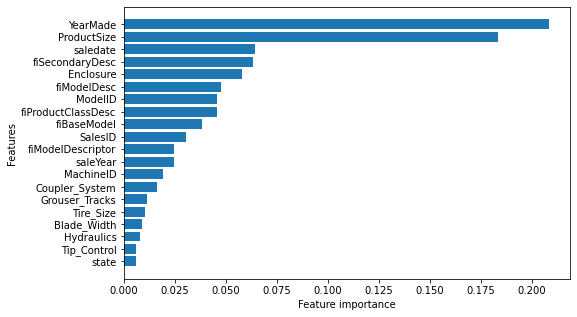

In [186]:
plot_features(X_train.columns, feature_importance )